In [1]:
import numpy as np
import sys

sys.path.append('../src')
from lda import GibbsLDA
from ncp import NCP
from sim import make_data, DataMaker
from slda import GibbsSLDA
from utils import map_labels, show_dataset

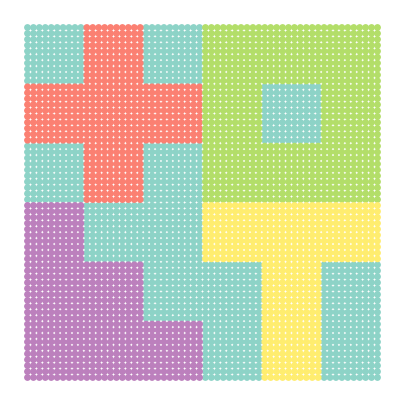

In [ ]:
data, labels = make_data()
show_dataset(data, labels, sectioned=True)

### Latent Dirichlet Allocation

LDA: 100%|██████████| 200/200 [00:10<00:00, 19.80it/s]


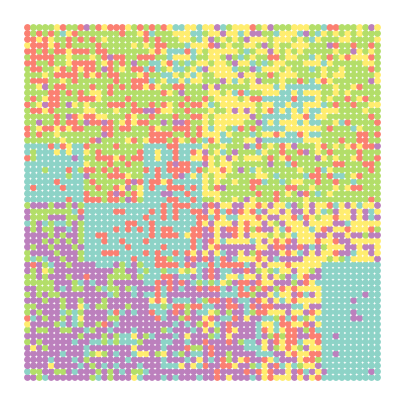

In [3]:
model = GibbsLDA()
topics = map_labels(labels, model.fit_predict(data))
show_dataset(data, topics, sectioned=True)

### Spatial Latent Dirichlet Allocation

SLDA: 100%|██████████| 200/200 [00:48<00:00,  4.12it/s]


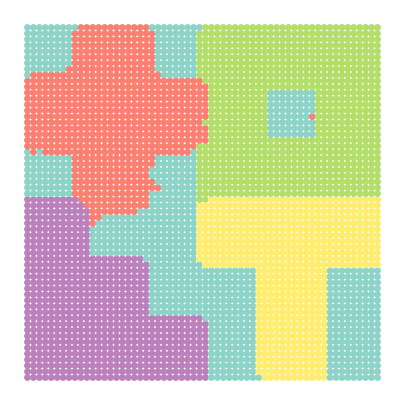

In [4]:
model = GibbsSLDA()
topics = map_labels(labels, model.fit_predict(data))
show_dataset(data, topics, sectioned=True)

### Neural Clustering Process

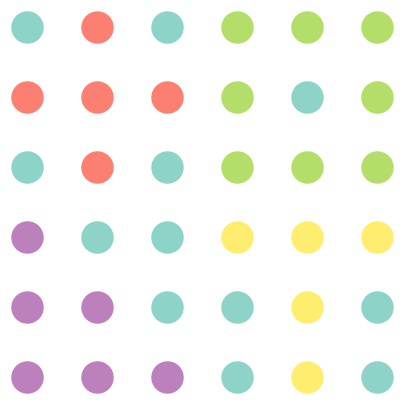

In [4]:
maker = DataMaker(block_size=1, n_features=10, batch_size=8, return_tensor=True)
data, labels = maker.make(batch_size=1, return_locations=True)
show_dataset(data[0], labels, size=500)

NCP: 100%|██████████| 200/200 [08:02<00:00,  2.41s/it]


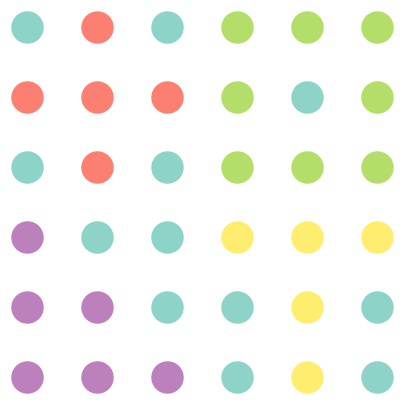

In [ ]:
WC_CHANNELS = (128, 128, 128, 128, 256)
BC_CHANNELS = (WC_CHANNELS[-1], 128, 128, 128, 128, 128, 512)
LP_CHANNELS = (WC_CHANNELS[-1] + BC_CHANNELS[-1], 128, 128, 128, 128)

model = NCP(WC_CHANNELS, BC_CHANNELS, LP_CHANNELS).fit(maker)
show_dataset(data[0], model(data[..., 2:]), size=500)